In [4]:
import requests
import bs4
import re
from bs4 import BeautifulSoup
import math
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 12]

# Retrieve Job Description Data from Indeed.com

In [33]:
base_url = ''

# Declare job titles to search on indeed.com
titles = [{
    'title': 'data scientist',
    'urltitle': 'data+scientist'
}, {
    'title': 'quantitative analyst',
    'urltitle': 'quantitative+analyst'
}, {
    'title': 'statistician',
    'urltitle': 'statistician'
}, {
    'title': 'data analyst',
    'urltitle': 'data+analyst'
}, {
    'title': 'research scientist',
    'urltitle': 'research+scientist'
}, {
    'title': 'machine learning engineer',
    'urltitle': 'machine+learning+engineer'
}, {
    'title': 'data engineer',
    'urltitle': 'data+engineer'
}]

In [34]:
# Function to retireve Job Description from provided job url
def storedescription(term, url):
    try:
        r = requests.get('https://www.indeed.com'+url)
        soup = BeautifulSoup(r.text, 'html.parser')
        description = soup.find('div', id="jobDescriptionText").get_text()
        jobdescription.append(description)
    except Exception as e:
        print(f'description error: {e}')
        jobdescription.append("")

In [35]:
# Lists to hold retrieved values
jobtitles = []
urls = []
jobclass = []
jobdescription = []

# search by job title
for term in titles:
    startlen = len(urls)
    try:
        r = requests.get('https://www.indeed.com/jobs?q={}&l=NJ&sort=date&limit=50'.format(term['urltitle']))
#         r = requests.get('https://www.indeed.com/jobs?q={}&l=New+York%2C+NY&sort=date&limit=50'.format(term['urltitle']))
        soup = BeautifulSoup(r.text, 'html.parser')
        count_str = soup.find('div', id="searchCountPages").get_text()
        max_results = int(count_str.split()[3].replace(',', ''))

        # calculate how many pages we need to query
        max_results = math.ceil(max_results/50)
        time.sleep(1)
    except Exception as e:
        print(f'title error: {e}') 

    print('Querying {} pages for {}'.format(max_results, term['title']))
    for x in range(0, max_results):

        try:
            split = '&start='+format(x*50)
            html = requests.get('https://www.indeed.com/jobs?q={}&l=NJ&sort=date&limit=50+{}'.format(term['urltitle'], split))
#             html = requests.get('https://www.indeed.com/jobs?q={}&l=New+York%2C+NY&sort=date&limit=50+{}'.format(term['urltitle'], split))
            soup = BeautifulSoup(html.text, 'html.parser')
            for link in soup.findAll('a'):
                try:
                    # only retireve urls from matching titles
                    if term['title'].lower() in link.attrs['title'].lower():
                        jobtitles.append(link.attrs['title'])
                        urls.append(link.attrs['href'])
                        jobclass.append(term['title'])
                        storedescription(term['title'], link.attrs['href'])
                        
                except Exception as e:
                    print(f'{x} attribute link error: {e}') 
            time.sleep(1)
        except Exception as e:
            print(f'link error: {e}')

    print('.. found {} results for {}'.format(len(urls)-startlen, term['title']))

Querying 4 pages for data scientist
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 at

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attrib

5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attrib

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

.. found 3 results for machine learning engineer
Querying 36 pages for data engineer
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link er

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribu

15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribu

17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribu

19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribu

21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribu

23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribu

25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribu

27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribu

29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribu

31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribu

33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribu

35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribu

In [36]:
print(len(jobtitles))
print(len(urls))
print(len(jobclass))
print(len(jobdescription))

102
102
102
102


In [37]:
df = pd.DataFrame({'title': jobtitles, 'jobclass': jobclass, 'url': urls, 'jobdescription': jobdescription})
#df = pd.DataFrame({'jobdescription': jobdescription})

In [38]:
df.to_csv("../exported_data/indeed_data_nj_raw.csv")

# Process Job Decsription Data

In [5]:
raw_df = pd.read_csv("../exported_data/indeed_data_nj_raw.csv")
del raw_df["Unnamed: 0"]

jobtitles_raw = raw_df.title.astype(str).values.tolist()
jobclass_raw = raw_df.jobclass.astype(str).values.tolist()
urls_raw = raw_df.url.astype(str).values.tolist()
jobdescription_raw = raw_df.jobdescription.astype(str).values.tolist()

print("Jobtitles: " + str(len(jobtitles_raw)))
print("URLS: " + str(len(urls_raw)))
print("Job Classes: " + str(len(jobclass_raw)))
print("Job Descriptions: " + str(len(jobdescription_raw)))

Jobtitles: 102
URLS: 102
Job Classes: 102
Job Descriptions: 102


In [6]:
raw_df.dtypes

title             object
jobclass          object
url               object
jobdescription    object
dtype: object

In [7]:
raw_df['title'].value_counts()

Data Analyst                                                            7
Data Engineer                                                           6
Post-Doctoral Research Scientist                                        4
Manager, Biostatistician                                                4
Data Scientist                                                          4
                                                                       ..
Clinical SAS Programmer/ Biostatistician - W2 only                      1
Senior Quantitative Analyst                                             1
(Sr.) Clinical Research Scientist, Clinical Development & Operations    1
Data Analyst- Healthcare Claims                                         1
Associate Research Scientist, Analytical R&D                            1
Name: title, Length: 73, dtype: int64

In [8]:
raw_df['jobclass'].value_counts()

data analyst                 23
data scientist               19
data engineer                17
research scientist           17
statistician                 17
quantitative analyst          6
machine learning engineer     3
Name: jobclass, dtype: int64

In [9]:
def preprocess(line):
    line = line.replace('\n', ' ') # newlines
    line = line.replace('(', ' ')
    line = line.replace(')', ' ')
    line = line.replace('[', ' ') 
    line = line.replace(']', ' ')
    line = line.replace('.', ' ')
    line = line.replace(',', ' ')
    line = line.replace('&', ' ')
    line = line.replace(' - ', ' ')
    line = line.replace(':', ' ') # We dont need summaries, just give me tokens
    line= line.replace('\t', ' ') #tabs
    
    # converts line endings in a way that stops the accidental camelcasing
    # but leaves terms like SAP intact
    line= re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', line)
    
    # regex to address the issue of text continuing directly after a period
    # instead of a space
    line = re.sub(r'\.(?! )', '. ', re.sub(r' +', ' ', line))
    return line

In [10]:
raw_df["jobdescription"][10]

'Overview:\nThe Senior Data Scientist independently develops statistical models that will enable future growth and profitability for our book of business through appropriate pricing and underwriting of risk. He/she is responsible for the formulation of statistical models and direct application of models to address insurance business issues.\nEssential Functions and Responsibilities\nProduces complex predictive models which enable the creation of rating plans and evaluation of risk and profitability.\nDevelops studies that evaluate new business models for customer retention and growth initiatives as well as estimate the lifetime value of customer segments.\nIdentifies drivers of insurance costs, understanding the economics of customers’ behavior and estimating the expected losses for segments of risks using advanced statistical and analytical techniques on large data sets.\nDevelop or participate in the development of the overall analytical framework to support the company’s strategy fo

In [11]:
# jobdescription = df.jobdescription
description = [preprocess(d) for d in jobdescription_raw]

len(description)

102

In [12]:
description[10]

'Overview The Senior Data Scientist independently develops statistical models that will enable future growth and profitability for our book of business through appropriate pricing and underwriting of risk He/she is responsible for the formulation of statistical models and direct application of models to address insurance business issues Essential Functions and Responsibilities Produces complex predictive models which enable the creation of rating plans and evaluation of risk and profitability Develops studies that evaluate new business models for customer retention and growth initiatives as well as estimate the lifetime value of customer segments Identifies drivers of insurance costs understanding the economics of customers’ behavior and estimating the expected losses for segments of risks using advanced statistical and analytical techniques on large data sets Develop or participate in the development of the overall analytical framework to support the company’s strategy for growth Comm

In [13]:
processed_df = pd.DataFrame({'title': jobtitles_raw, 'jobclass': jobclass_raw, 'url': urls_raw, 'jobdescription': description})
#processed_df = pd.DataFrame({'jobdescription': description})

In [14]:
processed_df.to_csv("../exported_data/indeed_data_nj_processed.csv")

# Find Words Counts from Processed Descriptions

In [15]:
postprocessed_df = pd.read_csv("../exported_data/indeed_data_nj_processed.csv")
del postprocessed_df["Unnamed: 0"]

jobtitles_post = postprocessed_df.title.astype(str).values.tolist()
jobclass_post = postprocessed_df.jobclass.astype(str).values.tolist()
urls_post = postprocessed_df.url.astype(str).values.tolist()
jobdescription_post = postprocessed_df.jobdescription.astype(str).values.tolist()

print("Jobtitles: " + str(len(jobtitles_post)))
print("URLS: " + str(len(urls_post)))
print("Job Classes: " + str(len(jobclass_post)))
print("Job Descriptions: " + str(len(jobdescription_post)))

Jobtitles: 102
URLS: 102
Job Classes: 102
Job Descriptions: 102


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

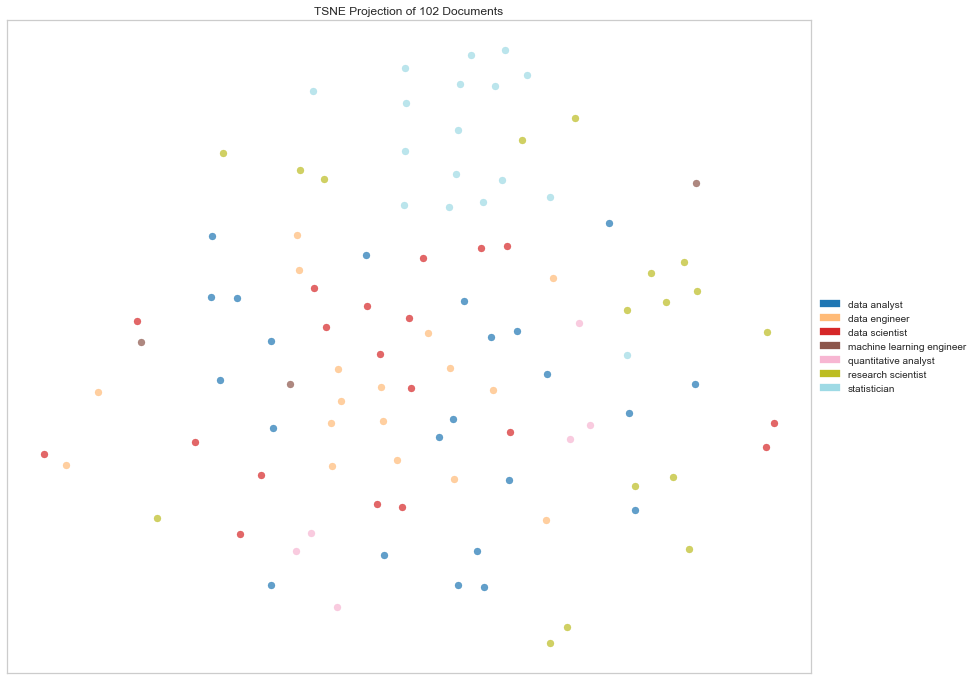

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer(stop_words='english')

X = tfidf.fit_transform(jobdescription_post)
y = jobclass_post

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(decompose_by=75, decompose='svd', colormap='tab20')
tsne.fit(X, y)
tsne.show()

In [17]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\budchris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Initializing Dictionary
d = {}
postprocessed_df["jobdescription_split"] = postprocessed_df["jobdescription"].astype(str).str.lower().str.split()

p_description = postprocessed_df["jobdescription_split"].apply(lambda x: [item for item in x if item not in stop])
p_description

0      [job, description, purpose, aml, financial, cr...
1      [bristol, myers, squibb, inspired, single, vis...
2      [bristol, myers, squibb, inspired, single, vis...
3      [software, engineering, technology, university...
4      [student, technology, agile, readiness, traini...
                             ...                        
97     [empi, rx, health, revolutionary, pharmacy, be...
98     [background, information, innovative, defense,...
99     [clearing, markets, issuer, services, technolo...
100    [you’ll, visible, engineering, team, seeking, ...
101    [tasks, responsibilities, primary, responsibil...
Name: jobdescription_split, Length: 102, dtype: object

In [19]:
# counting number of times each word comes up in list of words (in dictionary)
for word_list in p_description:
    #word_list = descr.split()
    for word in word_list: 
        d[word] = d.get(word, 0) + 1

In [20]:
word_freq = []
for key, value in d.items():
    word_freq.append((value, key))

In [21]:
word_freq.sort(reverse=True) 
print(word_freq)

[(921, 'data'), (441, 'experience'), (322, 'work'), (210, 'development'), (204, 'business'), (193, 'analysis'), (186, 'skills'), (182, 'team'), (181, 'clinical'), (168, 'statistical'), (160, 'management'), (155, 'years'), (145, 'research'), (140, 'required'), (134, 'ability'), (132, 'knowledge'), (119, 'support'), (110, 'including'), (108, 'solutions'), (107, 'quality'), (107, 'design'), (106, 'develop'), (101, 'strong'), (97, 'environment'), (96, 'requirements'), (92, 'related'), (92, 'job'), (91, 'analytics'), (88, 'systems'), (86, 'science'), (85, 'responsibilities'), (84, 'study'), (84, 'sql'), (83, 'technology'), (83, 'position'), (82, 'tools'), (82, 'company'), (81, 'within'), (81, 'understanding'), (81, 'new'), (79, 'review'), (78, 'provide'), (78, 'across'), (77, 'technical'), (77, 'analytical'), (76, 'degree'), (76, 'communication'), (75, 'preferred'), (75, 'opportunity'), (74, 'complex'), (73, 'models'), (72, 'using'), (72, 'services'), (71, 'learning'), (69, 'information'), 

# TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(jobdescription_raw)

In [23]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '03', '04', '05375', '07', '07033', '07677', '07960', '08807duration', '08901', '0hhzyallbn', '10', '100', '100x', '103', '11', '110', '116', '12', '120k', '124', '125', '13', '130kresponsibilitiesperforms', '15', '150', '15th', '16', '160', '170', '1777', '1784', '18', '19', '190b', '19486qualifications', '1973', '1976', '19visa', '1nf', '1st', '20', '200', '20003679', '20003680', '20005047', '2006905', '2007814', '2007842', '2008627', '2008697', '201', '2016', '2018', '2019', '2020', '2020job', '2021', '2022', '20st1350', '21', '22', '220', '230', '24', '248', '25', '27', '2775', '2776', '27s', '2d', '30', '301d', '31', '3209', '35', '350', '360', '37', '39', '3d', '3rd', '40', '400', '4009job', '401', '401k', '40hrs', '415', '43', '45', '45092', '45220', '454', '4542', '48', '48076', '50', '5094', '52', '54', '55', '5g', '60', '600', '609', '6173', '65', '68949', '6nf', '70', '72', '740', '75', '800', '82914', '85', '866', '90', '9085200727', '946', '96003', '98572', '

In [24]:
print(X[0,])

  (0, 34)	0.03325087636854252
  (0, 1166)	0.03325087636854252
  (0, 1532)	0.032517634853692086
  (0, 4543)	0.03403472509502851
  (0, 3849)	0.029982433973492706
  (0, 2011)	0.04826774129337025
  (0, 2982)	0.029982433973492706
  (0, 2262)	0.039054519643791724
  (0, 3327)	0.027911024028902835
  (0, 113)	0.056142794513209325
  (0, 0)	0.0623589328479053
  (0, 112)	0.04366113046858099
  (0, 1106)	0.03677463962588564
  (0, 4730)	0.027911024028902835
  (0, 86)	0.056142794513209325
  (0, 31)	0.056142794513209325
  (0, 122)	0.056142794513209325
  (0, 52)	0.056142794513209325
  (0, 3295)	0.056142794513209325
  (0, 4201)	0.056142794513209325
  (0, 964)	0.039054519643791724
  (0, 5008)	0.022993125232450617
  (0, 1767)	0.024642581633853012
  (0, 1734)	0.021553061050400165
  (0, 4725)	0.04826774129337025
  :	:
  (0, 4977)	0.04678850661446066
  (0, 165)	0.0965354825867405
  (0, 2352)	0.11472143059619912
  (0, 366)	0.11228558902641865
  (0, 992)	0.11228558902641865
  (0, 4828)	0.08828434281071773
  (0,

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

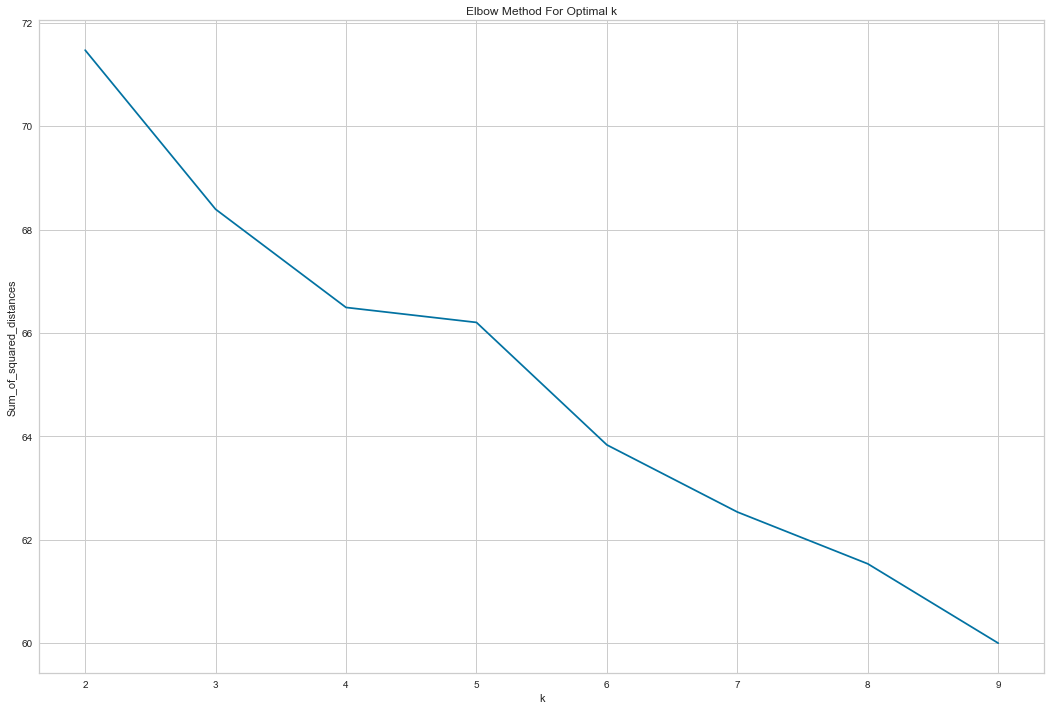

In [26]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
true_k = 1
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
indeed_cl=pd.DataFrame(list(zip(jobclass_raw,labels)),columns=['title','cluster'])
print(indeed_cl.sort_values(by=['cluster']))

indeed_cl.cluster.value_counts()

                  title  cluster
0        data scientist        0
73   research scientist        0
72   research scientist        0
71   research scientist        0
70   research scientist        0
..                  ...      ...
29         statistician        0
28         statistician        0
27         statistician        0
37         statistician        0
101       data engineer        0

[102 rows x 2 columns]


0    102
Name: cluster, dtype: int64

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\budchris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\budchris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cluster: 0
Titles:
            data scientist
      quantitative analyst
              statistician
              data analyst
        research scientist
 machine learning engineer
             data engineer


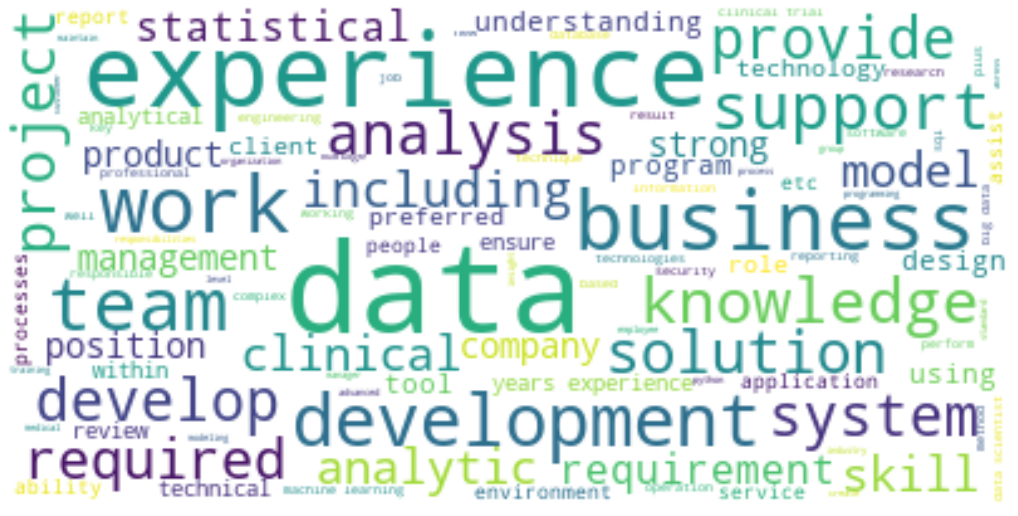

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english'))  

result={'cluster':labels,'jobdescription':jobdescription_post}
result=pd.DataFrame(result)
for k in range(0,true_k):
# for k in range(0,1):
    s=result[result.cluster==k]
    
    text=s['jobdescription'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    text=' '.join([str(elem) for elem in filtered_sentence])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles:')
    titles=indeed_cl[indeed_cl.cluster==k]['title']
    titles=titles.drop_duplicates()
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()